# Data Analysis and EDA

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib
import os

In [22]:

# total_count = 0
# for dataset in os.listdir('../data/stackechange_csv'):
#     for chunk in pd.read_csv(f'../data/stackechange_csv/{dataset}', delimiter=',', chunksize=10_000):
#         count = len(chunk.index)
#         total_count += count
#     print(total_count)
# print(total_count)

In [23]:
df = pd.read_csv('../data/stackechange_csv/datascience.stackexchange.com-posts.csv', sep=',')
df.dtypes

Id                 int64
PostTypeId         int64
ParentId         float64
CreationDate      object
Score              int64
ViewCount        float64
FavoriteCount    float64
Title             object
Body              object
Tags              object
Topic             object
dtype: object

In [24]:
df.shape

(72871, 11)

In [25]:
# get first 5 rows 
df.head()

,Id,PostTypeId,ParentId,CreationDate,Score,ViewCount,FavoriteCount,Title,Body,Tags,Topic
0,5,1,NaN,2014-05-13T23:58:30.457,9,862.0,1.0,How can I do simple machine learning without h...,<p>I've always been interested in machine lear...,<machine-learning>,datascience
1,7,1,NaN,2014-05-14T00:11:06.457,4,469.0,1.0,What open-source books (or other materials) pr...,"<p>As a researcher and instructor, I'm looking...",<education><open-source>,datascience
2,9,2,5.0,2014-05-14T00:36:31.077,5,NaN,NaN,NaN,"<p>Not sure if this fits the scope of this SE,...",NaN,datascience
3,10,2,7.0,2014-05-14T00:53:43.273,13,NaN,NaN,NaN,"<p>One book that's freely available is ""The El...",NaN,datascience
4,14,1,NaN,2014-05-14T01:25:59.677,26,1884.0,6.0,Is Data Science the Same as Data Mining?,<p>I am sure data science as will be discussed...,<data-mining><definitions>,datascience


In [26]:
# dataset size
df.count()

Id               72871
PostTypeId       72871
ParentId         37803
CreationDate     72871
Score            72871
ViewCount        34395
FavoriteCount     8786
Title            34395
Body             72705
Tags             34395
Topic            72871
dtype: int64

In [27]:
df['Id'].count()

72871

In [33]:
df2 = df[df['PostTypeId'].isin([1.0, 2.0])]

<AxesSubplot:>

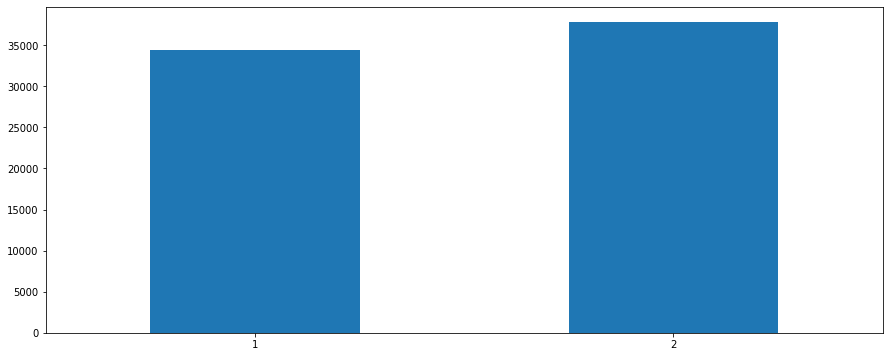

In [35]:
df2['PostTypeId'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6), rot=0)


In [89]:
df['ParentId'].isna().sum()

35069

In [90]:
df[df['PostTypeId'] == 1].count()

Id               34395
PostTypeId       34395
ParentId             0
CreationDate     34395
Score            34395
ViewCount        34395
FavoriteCount     8786
Title            34395
Body             34395
Tags             34395
Topic            34395
dtype: int64

<AxesSubplot:xlabel='CreationDate'>

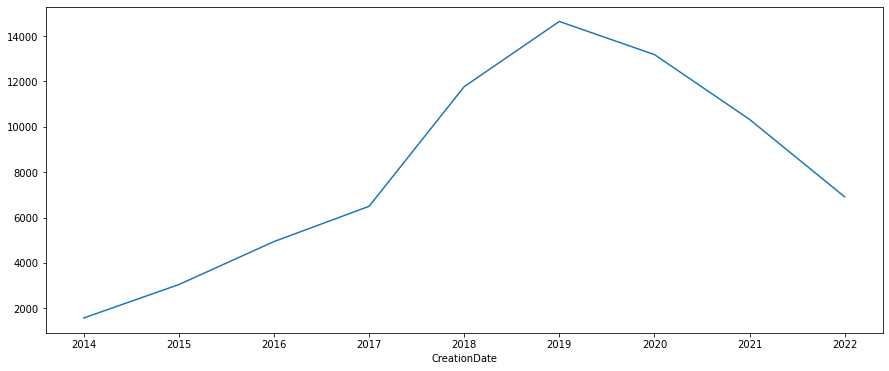

In [91]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df_count = df.groupby(df['CreationDate'].dt.year).size()
df_count.plot(kind='line', figsize=(15, 6))

In [92]:
df['Score'].describe()

count    72871.000000
mean         2.045738
std          6.258718
min         -6.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        439.000000
Name: Score, dtype: float64

<AxesSubplot:>

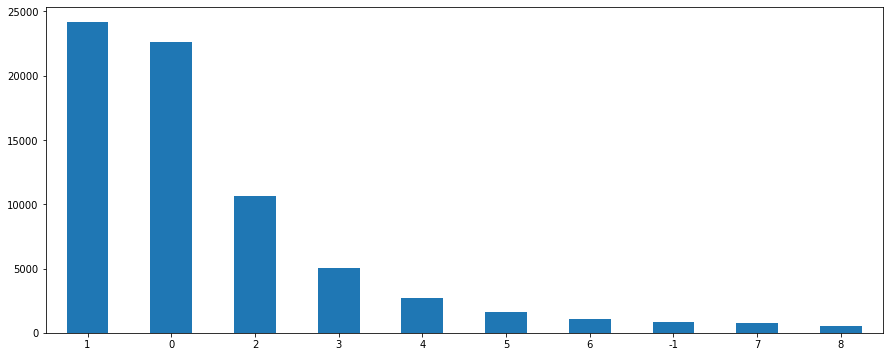

In [37]:
df['Score'].value_counts()[:10].plot(kind='bar', figsize=(15, 6), rot=0)

In [94]:
df['Body'].fillna('', inplace=True)
df['Title'].fillna('', inplace=True)
df['Tags'].fillna('', inplace=True)


In [8]:
# Convert Tags format <Tag1><Tag2> to List format [tag1, tag2, ...]
def tags_to_list(string):
    string = str(string)
    tags = []
    curr_tag = ''
    for s in string:
        curr_tag += s
        if s == '<':
            curr_tag = ''
        if s == '>':
            tags.append(re.sub('<|>', '', curr_tag))
    return tags

df['TagsList'] = df['Tags'].apply(tags_to_list)

In [34]:
# Add new column for post body length
df['BodyLength'] = df['Body'].apply(lambda x: len(str(x)))

In [35]:
# Plot body length distribution
df['BodyLength'].describe()
# df['BodyLength'].plot(kind='hist')

count    72872.000000
mean      1097.514642
std       1191.037826
min          0.000000
25%        461.000000
50%        784.000000
75%       1327.000000
max      32461.000000
Name: BodyLength, dtype: float64

In [54]:
df['BodyLength'].value_counts()

0        167
524       85
376       80
408       79
452       79
        ... 
8911       1
5424       1
23801      1
6920       1
3151       1
Name: BodyLength, Length: 5139, dtype: int64

In [65]:
df['BodyLength'].dropna()

0         533
1         339
2        1037
3         519
4         411
         ... 
72867     312
72868    2323
72869     668
72870     261
72871       0
Name: BodyLength, Length: 72872, dtype: int64

In [81]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df = remove_outliers(df, ['BodyLength'], 5)

df['BodyLength'].describe()

Working on column: BodyLength


count    70146.000000
mean       933.962207
std        656.033234
min          0.000000
25%        450.000000
50%        755.000000
75%       1240.000000
max       3341.000000
Name: BodyLength, dtype: float64

array([[<AxesSubplot:title={'center':'BodyLength'}>]], dtype=object)

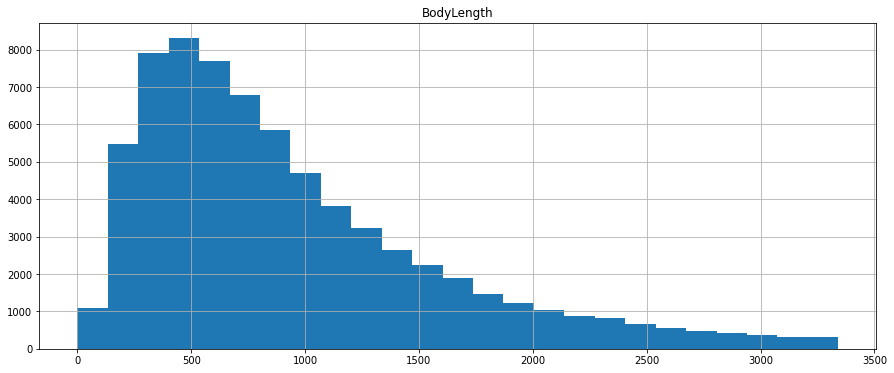

In [74]:
df.hist(column='BodyLength', bins=25, figsize=(15, 6))

In [38]:
# Duplicated posts by Id, Title, Body
print(df.duplicated('Id').any())
print(df.duplicated('Title').sum())
print(df.duplicated('Body').sum())

False
38484
178


In [15]:
df[df['Tags'] == '<discussion>'].shape

(0, 12)

neural-networks                  2276
reinforcement-learning           2135
machine-learning                 2040
deep-learning                    1754
convolutional-neural-networks    1044
                                 ... 
open-face                           1
case-based-reasoning                1
instance-based-learning             1
leaky-relu                          1
energy-based-models                 1
Name: TagsList, Length: 978, dtype: int64


<AxesSubplot: >

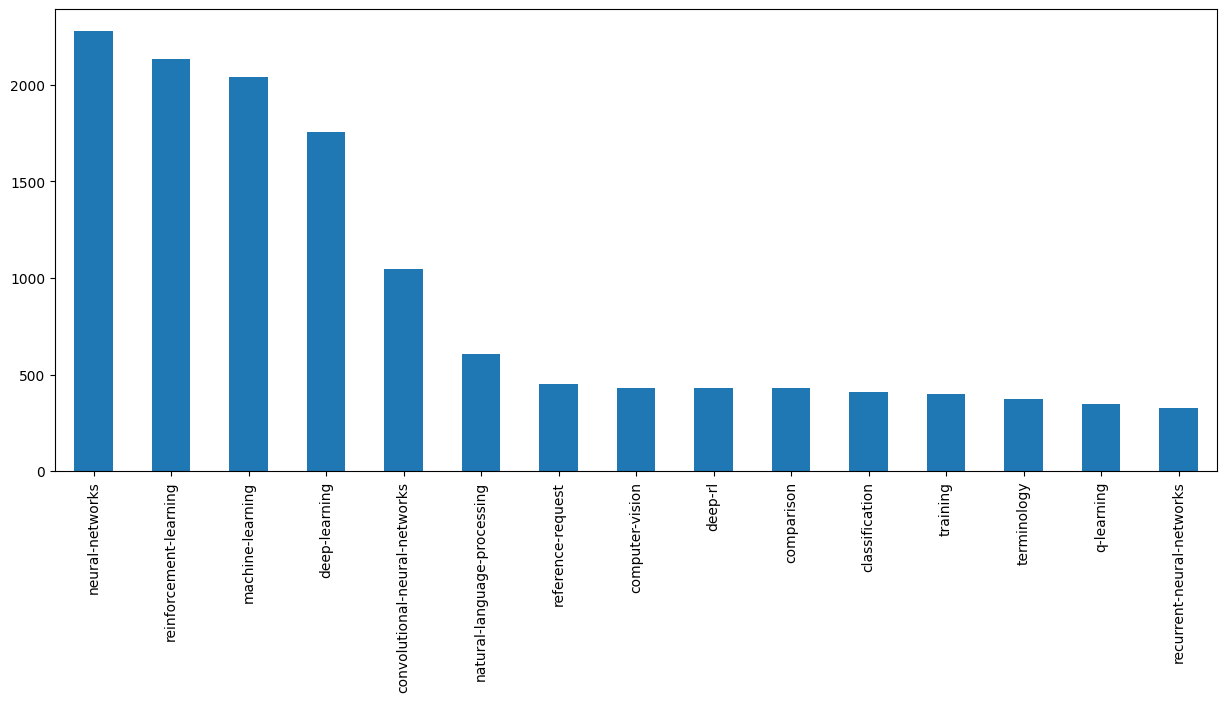

In [9]:
# Values counts on each Tag
print(df['TagsList'].explode().value_counts())

# Top 15 tags by numerosity
df['TagsList'].explode().value_counts().sort_values(ascending=False)[:15].plot(kind='bar', figsize=(15, 6))

In [17]:
# df['TagsList'].explode().value_counts().plot(kind='hist')

In [19]:
df['Tags'].unique().shape

(8552,)

<AxesSubplot:>

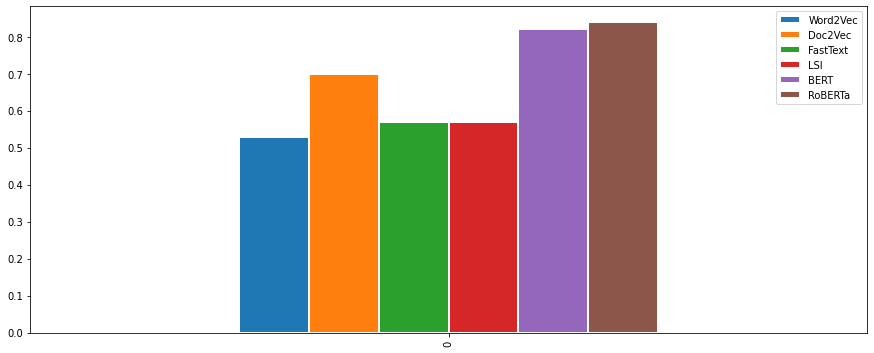

In [116]:
d = {'Word2Vec': [0.53], 'Doc2Vec': [0.70], 'FastText': [0.57], 'LSI': [0.57], 'BERT': [0.82], 'RoBERTa': [0.84]}
df = pd.DataFrame(data=d)
df.plot(kind='bar', edgecolor='white', linewidth=2, figsize=(15, 6))